In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage import filters
import cv2 as cv
from PIL import Image, ImageDraw
from math import sqrt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]]


box_kernel2 = np.array([[0 / 9, 0 / 9, 0 / 9, 0 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 0 / 9, 0 / 9, 0 / 9, 0 / 9]])
              

# Gaussian kernel
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

In [3]:
def convol(image, kernel):


    # Select kernel here:
    kernel = kernel

    # Middle of the kernel
    offset = len(kernel) // 2

    # Create output image
    output_image = np.zeros(np.shape(image))
    # draw = ImageDraw.Draw(output_image)

    # Compute convolution between intensity and kernels
    for x in range(offset, input_image.width - offset):
        for y in range(offset, input_image.height - offset):
            acc = [0, 0, 0]
            for a in range(len(kernel)):
                for b in range(len(kernel)):
                    xn = x + a - offset
                    yn = y + b - offset
                    pixel = input_pixels[xn, yn]
                    acc[0] += pixel[0] * kernel[a][b]
                    acc[1] += pixel[1] * kernel[a][b]
                    acc[2] += pixel[2] * kernel[a][b]

            draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))

    
        
    
    return output_image

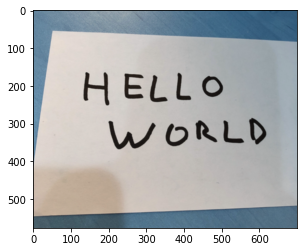

In [15]:
input_image = cv.imread("hello_world.png")
convolImage = cv.filter2D(input_image, -1, box_kernel2)

plt.imshow(convolImage) 
plt.show()  

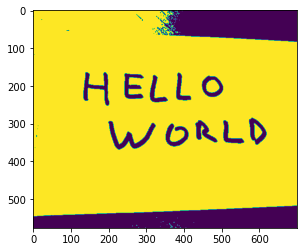

In [25]:

imgray = cv.cvtColor(convolImage, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(thresh) 
plt.show()  

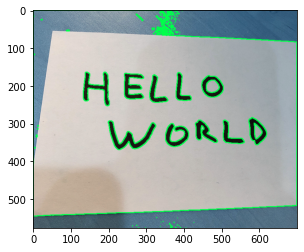

In [26]:
img = cv.drawContours(input_image, contours, -1, (0, 255,75), 2)
plt.imshow(img)

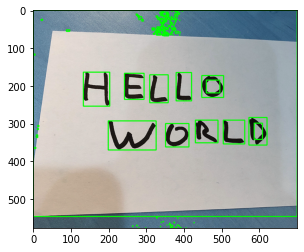

In [27]:
img = cv.imread('hello_world.png')
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    cv.rectangle(img, (x,y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img)

In [ ]:
# TODO avant janvier
# - Fichier CSV qui contient le dataset de lettre et de chiffre
# - une fonction pour récupérer les images contenus
# - On doit mettre en place un CNN grace a ce dataset pour lire les lettre récupére grace pre-procécing 


# -----------------------------
#   FUNCTIONS
# pour récupérer les data dans les csv
# -----------------------------
def load_az_dataset(datasetPath):
    # Initialize the list of data and labels
    data = []
    labels = []
    # Loop over the rows of the A-Z handwritten digit dataset
    for row in open(datasetPath):
        # Parse the label and image from the row
        row = row.split(",")
        label = int(row[0])
        image = np.array([int(x) for x in row[1:]], dtype="uint8")
        # Images are represented as single channel (grayscale) images that are 28x28=784 pixels
        # -- we need to take this flattened 784-d list of numbers and reshape them into a 28x28 matrix
        image = image.reshape((28, 28))
        # Update the list of data and labels
        data.append(image)
        labels.append(label)
    # Convert the data and labels to NumPy arrays
    data = np.array(data, dtype="float32")
    labels = np.array(labels, dtype="int")
    # Return a 2-tuple of the A-Z data and labels
    return data, labels